In [37]:
import yfinance as yf
import pandas as pd

def create_df_for_multi_companies(
        raw_data_multiindex:pd.MultiIndex, 
        stock_var:str, 
        companies:list[str]):
    
    raw_values = {}
    for company in companies:
        # Transform MultiIndex DF into SingleIndex DF for each company with all prices (Open, Close... Adj. Close)
        raw_data_by_company = raw_data_multiindex.xs(key=company, level='Ticker', axis=1, drop_level=False)
        # Grab only the Datetime and the desired price (e.g., colums -> [Datetime | Open])
        raw_data_series = raw_data_by_company[(stock_var,company)]
        # Make a dictionary of type {company[x] : [Open Values 0, 1, ... N] ... }
        raw_values[company] = raw_data_series.values
    # Create 'df' Dataframe only with "Datetime" Column
    df = pd.DataFrame({'Datetime':raw_data_series.index})
    # Append all columns with values for each company, resulting in [Datetime | Company_values[x] ...]
    df = df.assign(**raw_values)
    return df

def get_finance_df(
        companies:str|list[str], 
        start_date:str, 
        end_date:str, 
        stock_var:str='Adj Close') -> pd.DataFrame:
    
    try:
        # In case companies is a string, transform into a list of 1 object, like: ['company']
        if not isinstance(companies,list):
            companies:list[str] = [companies]
        
        # Download data using yfinance
        raw_data_multiindex:pd.MultiIndex = yf.download(tickers=companies, start=start_date, end=end_date)

        # Transform the raw data into a suitable DF
        df = create_df_for_multi_companies(raw_data_multiindex, stock_var, companies)

        return df
    
    except:
            Exception("Unexpected error: something wrong occurred while creating the finance DF")



In [39]:
# from feature_engineering import get_finance_df

# Load dataset
company_inputs = ['PETR4.SA', 'BZ=F', '6L=F']
# company_inputs = 'PETR4.SA'
company_output = 'PETR4.SA'
end_date = '2024-10-01' 
start_date = '2020-01-01'
stock_var = 'Adj Close'

df = get_finance_df(company_inputs, start_date, end_date, stock_var)
df = df.fillna(0)

print(df)


[*********************100%***********************]  3 of 3 completed

                      Datetime   PETR4.SA       BZ=F     6L=F
0    2020-01-02 00:00:00+00:00  10.621438  66.250000  0.24810
1    2020-01-03 00:00:00+00:00  10.534944  68.599998  0.24655
2    2020-01-06 00:00:00+00:00  10.659495  68.910004  0.24625
3    2020-01-07 00:00:00+00:00  10.617978  68.269997  0.24590
4    2020-01-08 00:00:00+00:00  10.552244  65.440002  0.24695
...                        ...        ...        ...      ...
1220 2024-09-24 00:00:00+00:00  36.779999  75.169998  0.18335
1221 2024-09-25 00:00:00+00:00  37.049999  73.459999  0.18255
1222 2024-09-26 00:00:00+00:00  36.250000  71.599998  0.18380
1223 2024-09-27 00:00:00+00:00  36.110001  71.980003  0.18400
1224 2024-09-30 00:00:00+00:00  36.009998  71.769997  0.18355

[1225 rows x 4 columns]


In [18]:
# from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)


In [19]:
df.shift(-1)

,Datetime,PETR4.SA,BZ=F,6L=F
0,2020-01-03 00:00:00+00:00,10.534944,68.599998,0.24655
1,2020-01-06 00:00:00+00:00,10.659495,68.910004,0.24625
2,2020-01-07 00:00:00+00:00,10.617978,68.269997,0.24590
3,2020-01-08 00:00:00+00:00,10.552244,65.440002,0.24695
4,2020-01-09 00:00:00+00:00,10.517646,65.370003,0.24445
...,...,...,...,...
1220,2024-09-25 00:00:00+00:00,37.049999,73.459999,0.18255
1221,2024-09-26 00:00:00+00:00,36.250000,71.599998,0.18380
1222,2024-09-27 00:00:00+00:00,36.110001,71.980003,0.18400
1223,2024-09-30 00:00:00+00:00,36.009998,71.769997,0.18355


In [20]:
horizon = 3
lags = range(1,horizon)

pd.concat([df.shift(t).add_suffix(f" (t-{t})") for t in lags], axis=1)

,Datetime (t-1),PETR4.SA (t-1),BZ=F (t-1),6L=F (t-1),Datetime (t-2),PETR4.SA (t-2),BZ=F (t-2),6L=F (t-2)
0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2020-01-02 00:00:00+00:00,10.621438,66.250000,0.24810,NaT,NaN,NaN,NaN
2,2020-01-03 00:00:00+00:00,10.534944,68.599998,0.24655,2020-01-02 00:00:00+00:00,10.621438,66.250000,0.24810
3,2020-01-06 00:00:00+00:00,10.659495,68.910004,0.24625,2020-01-03 00:00:00+00:00,10.534944,68.599998,0.24655
4,2020-01-07 00:00:00+00:00,10.617978,68.269997,0.24590,2020-01-06 00:00:00+00:00,10.659495,68.910004,0.24625
...,...,...,...,...,...,...,...,...
1220,2024-09-23 00:00:00+00:00,36.630001,73.900002,0.18065,2024-09-20 00:00:00+00:00,36.259998,74.489998,0.18120
1221,2024-09-24 00:00:00+00:00,36.779999,75.169998,0.18335,2024-09-23 00:00:00+00:00,36.630001,73.900002,0.18065
1222,2024-09-25 00:00:00+00:00,37.049999,73.459999,0.18255,2024-09-24 00:00:00+00:00,36.779999,75.169998,0.18335
1223,2024-09-26 00:00:00+00:00,36.250000,71.599998,0.18380,2024-09-25 00:00:00+00:00,37.049999,73.459999,0.18255


In [21]:
horizon = 3
lags = range(1,horizon)

df_lag = pd.concat([df[company_inputs].shift(t).add_suffix(f" (t-{t})") for t in lags], axis=1)

df_lag_full = pd.concat([df, df_lag], axis=1)

In [22]:
df_lag_full.dropna().reset_index(drop=True)

,Datetime,PETR4.SA,BZ=F,6L=F,PETR4.SA (t-1),BZ=F (t-1),6L=F (t-1),PETR4.SA (t-2),BZ=F (t-2),6L=F (t-2)
0,2020-01-06 00:00:00+00:00,10.659495,68.910004,0.24625,10.534944,68.599998,0.24655,10.621438,66.250000,0.24810
1,2020-01-07 00:00:00+00:00,10.617978,68.269997,0.24590,10.659495,68.910004,0.24625,10.534944,68.599998,0.24655
2,2020-01-08 00:00:00+00:00,10.552244,65.440002,0.24695,10.617978,68.269997,0.24590,10.659495,68.910004,0.24625
3,2020-01-09 00:00:00+00:00,10.517646,65.370003,0.24445,10.552244,65.440002,0.24695,10.617978,68.269997,0.24590
4,2020-01-10 00:00:00+00:00,10.472671,64.980003,0.24490,10.517646,65.370003,0.24445,10.552244,65.440002,0.24695
...,...,...,...,...,...,...,...,...,...,...
1218,2024-09-24 00:00:00+00:00,36.779999,75.169998,0.18335,36.630001,73.900002,0.18065,36.259998,74.489998,0.18120
1219,2024-09-25 00:00:00+00:00,37.049999,73.459999,0.18255,36.779999,75.169998,0.18335,36.630001,73.900002,0.18065
1220,2024-09-26 00:00:00+00:00,36.250000,71.599998,0.18380,37.049999,73.459999,0.18255,36.779999,75.169998,0.18335
1221,2024-09-27 00:00:00+00:00,36.110001,71.980003,0.18400,36.250000,71.599998,0.18380,37.049999,73.459999,0.18255


In [23]:
df_lag_full.dropna()

,Datetime,PETR4.SA,BZ=F,6L=F,PETR4.SA (t-1),BZ=F (t-1),6L=F (t-1),PETR4.SA (t-2),BZ=F (t-2),6L=F (t-2)
2,2020-01-06 00:00:00+00:00,10.659495,68.910004,0.24625,10.534944,68.599998,0.24655,10.621438,66.250000,0.24810
3,2020-01-07 00:00:00+00:00,10.617978,68.269997,0.24590,10.659495,68.910004,0.24625,10.534944,68.599998,0.24655
4,2020-01-08 00:00:00+00:00,10.552244,65.440002,0.24695,10.617978,68.269997,0.24590,10.659495,68.910004,0.24625
5,2020-01-09 00:00:00+00:00,10.517646,65.370003,0.24445,10.552244,65.440002,0.24695,10.617978,68.269997,0.24590
6,2020-01-10 00:00:00+00:00,10.472671,64.980003,0.24490,10.517646,65.370003,0.24445,10.552244,65.440002,0.24695
...,...,...,...,...,...,...,...,...,...,...
1220,2024-09-24 00:00:00+00:00,36.779999,75.169998,0.18335,36.630001,73.900002,0.18065,36.259998,74.489998,0.18120
1221,2024-09-25 00:00:00+00:00,37.049999,73.459999,0.18255,36.779999,75.169998,0.18335,36.630001,73.900002,0.18065
1222,2024-09-26 00:00:00+00:00,36.250000,71.599998,0.18380,37.049999,73.459999,0.18255,36.779999,75.169998,0.18335
1223,2024-09-27 00:00:00+00:00,36.110001,71.980003,0.18400,36.250000,71.599998,0.18380,37.049999,73.459999,0.18255


In [24]:
horizon = 1

# Assuming x1, x2, x3 are columns in your DataFrame
features = df[company_inputs]
target = df[company_output].shift(-horizon).fillna(0)  # Shift x3 by horizon h

In [25]:
features

,PETR4.SA,BZ=F,6L=F
0,10.621438,66.250000,0.24810
1,10.534944,68.599998,0.24655
2,10.659495,68.910004,0.24625
3,10.617978,68.269997,0.24590
4,10.552244,65.440002,0.24695
...,...,...,...
1220,36.779999,75.169998,0.18335
1221,37.049999,73.459999,0.18255
1222,36.250000,71.599998,0.18380
1223,36.110001,71.980003,0.18400


In [26]:
target

0       10.534944
1       10.659495
2       10.617978
3       10.552244
4       10.517646
          ...    
1220    37.049999
1221    36.250000
1222    36.110001
1223    36.009998
1224     0.000000
Name: PETR4.SA, Length: 1225, dtype: float64

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Assuming x1, x2, x3 are columns in your DataFrame
features = df[company_inputs].values
target = df[company_output].shift(-horizon).fillna(0).values  # Shift x3 by horizon h

# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Normalize the Price column
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

# Create a TimeseriesGenerator with multivariable inputs
seq_length = 10  # Sequence length
batch_size = 32

# Initialize generator with multivariable input and single target
generator = TimeseriesGenerator(features, target, length=seq_length, batch_size=batch_size)


In [32]:
X, y = generator[0]

print("Shape of X:", X.shape)  # Should be (batch_size, seq_length, num_features)
print("Shape of y:", y.shape)  # Should be (batch_size, 1)

# Print the first sequence and its corresponding target
print("First sequence (X[0]):\n", X[0:3])   # Sequence of features
print("Target for first sequence (y[0]):", y[0:3])  # Target value

Shape of X: (32, 10, 3)
Shape of y: (32,)
First sequence (X[0]):
 [[[10.62143803 66.25        0.2481    ]
  [10.53494358 68.59999847  0.24654999]
  [10.65949535 68.91000366  0.24625   ]
  [10.6179781  68.26999664  0.24590001]
  [10.55224419 65.44000244  0.24695   ]
  [10.51764584 65.37000275  0.24445   ]
  [10.47267056 64.98000336  0.2449    ]
  [10.49342918 64.19999695  0.2412    ]
  [10.37925625 64.48999786  0.24160001]
  [10.22356796 64.          0.23935001]]

 [[10.53494358 68.59999847  0.24654999]
  [10.65949535 68.91000366  0.24625   ]
  [10.6179781  68.26999664  0.24590001]
  [10.55224419 65.44000244  0.24695   ]
  [10.51764584 65.37000275  0.24445   ]
  [10.47267056 64.98000336  0.2449    ]
  [10.49342918 64.19999695  0.2412    ]
  [10.37925625 64.48999786  0.24160001]
  [10.22356796 64.          0.23935001]
  [10.21318626 64.62000275  0.23810001]]

 [[10.65949535 68.91000366  0.24625   ]
  [10.6179781  68.26999664  0.24590001]
  [10.55224419 65.44000244  0.24695   ]
  [10.5176

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# # Split the data into training and testing sets
# train_size = int(0.8 * len(X))
# X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# # Reshape the input data for LSTM
# X_train = X_train.reshape(-1, n_steps, 1)
# X_test = X_test.reshape(-1, n_steps, 1)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, len(company_inputs))),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(generator, epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 56.5721
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.4395
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9612
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2918
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.8122
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.2045
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.4955
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.7621
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2410
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.2643
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.5400
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3876
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3229
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6252
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [14]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [16]:
import mlflow
import mlflow.tensorflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:7777")
mlflow.set_experiment("LSTM Experiments")

from sklearn.metrics import root_mean_squared_error, r2_score

mlflow.tensorflow.autolog()
with mlflow.start_run():
    mlflow.tensorflow.log_model(model, "model")

    # Calculate RMSE and R² score
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'RMSE: {rmse:.4f}')
    print(f'R² Score: {r2:.4f}')

    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2-Score", r2)

2024/11/12 13:26:26 INFO mlflow.tracking.fluent: Experiment with name 'LSTM Experiments' does not exist. Creating a new experiment.
2024/11/12 13:26:26 WARNING mlflow.utils.autologging_utils: MLflow tensorflow autologging is known to be compatible with 2.7.4 <= tensorflow <= 2.17.0, but the installed version is 2.18.0. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a compatible version, or try upgrading MLflow.
2024/11/12 13:26:27 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/11/12 13:27:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/12 13:27:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefre

RMSE: 0.0226
R² Score: 0.8743


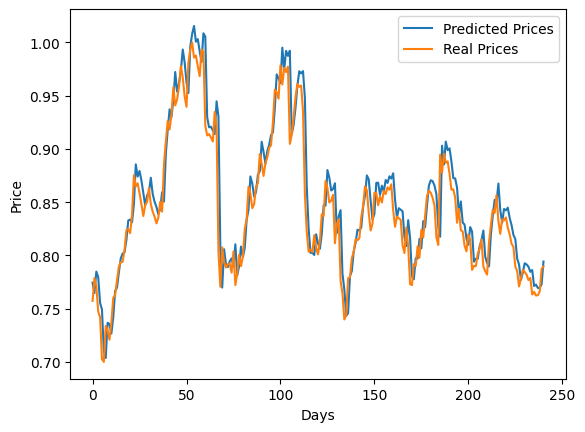

In [17]:
import matplotlib.pyplot as plt

# Plot the predicted prices
plt.plot(y_pred, label="Predicted Prices")
plt.plot(y_test, label="Real Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [18]:
# Predict using the trained model
future_steps = 10  # Number of days to predict
future_data = data[-n_steps:].reshape(-1, n_steps, 1)
predicted_prices = []

for i in range(future_steps):
    prediction = model.predict(future_data)[0, 0]
    predicted_prices.append(prediction)
    future_data = np.roll(future_data, -1, axis=1)
    future_data[0, -1] = prediction

# Inverse transform the predicted prices to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


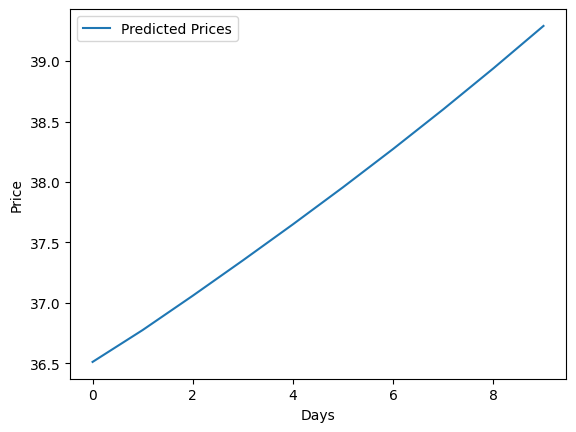

In [19]:
import matplotlib.pyplot as plt

# Plot the predicted prices
plt.plot(predicted_prices, label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()